You are designing a virtual mobile robot that operates in a 2D environment. 
The robot must navigate from a start position to a goal position while avoiding static obstacles in the environment.
Environment Setup

    2D Grid:

        Size: 20×20 cells (or 10×10 meters scaled to pixels).

        Each cell can be empty or obstacle.

    Obstacles:

        Randomly placed rectangular blocks (e.g., 10–15% of grid cells).

    Robot:

        Starts at a given (x, y) location.

        Goal is a fixed target (x, y) in the grid.

In [1]:
# Create the grid
import numpy as np

X = 20
Y = 20
grid = np.zeros((X, Y))



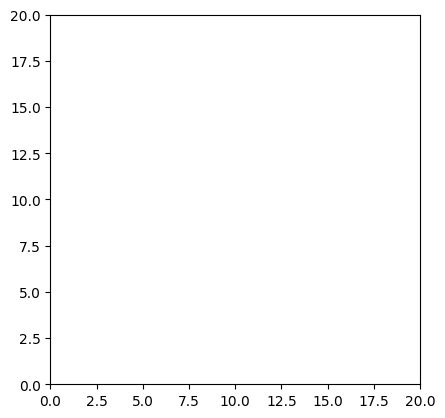

In [2]:
import matplotlib.pyplot as plt

plt.imshow(grid, cmap='gray_r', origin = 'lower', extent=[0,X,0,Y])

In [3]:
import random

obstacleValue = 100;

def addObstacle(l, b):
    x = random.randint(1, 14);
    y = random.randint(1, 14);

    print("creating an obstacle of size", l, "x", b, "at", x, ',', y);

    count = 0;
    for i in range(x, x+b):
        for j in range(y, y+l):
            grid[i][j] = obstacleValue;
            count += 1;
    print("Obstacle count =", count);
    return count;

In [4]:
def isObstacle(x):
    return x == obstacleValue;

In [5]:
def obstaclePercent(obstableCellCount):
    return obstableCellCount*100/(X*Y)

In [6]:
# keep adding obstacles until 10 to 15% of the grid has obstacles

expectedObstablePercent = random.randint(10, 15)

obstableCellCount = 0;

while obstaclePercent(obstableCellCount) < expectedObstablePercent:
    l = random.randint(1, 5);
    b = random.randint(1, 5);
    obstableCellCount += addObstacle(l, b);

creating an obstacle of size 4 x 1 at 7 , 7
Obstacle count = 4
creating an obstacle of size 5 x 1 at 13 , 6
Obstacle count = 5
creating an obstacle of size 3 x 1 at 13 , 1
Obstacle count = 3
creating an obstacle of size 3 x 5 at 2 , 10
Obstacle count = 15
creating an obstacle of size 1 x 1 at 10 , 5
Obstacle count = 1
creating an obstacle of size 1 x 2 at 11 , 14
Obstacle count = 2
creating an obstacle of size 5 x 1 at 2 , 11
Obstacle count = 5
creating an obstacle of size 1 x 2 at 7 , 14
Obstacle count = 2
creating an obstacle of size 2 x 4 at 12 , 7
Obstacle count = 8
creating an obstacle of size 2 x 5 at 11 , 13
Obstacle count = 10
creating an obstacle of size 5 x 4 at 6 , 1
Obstacle count = 20


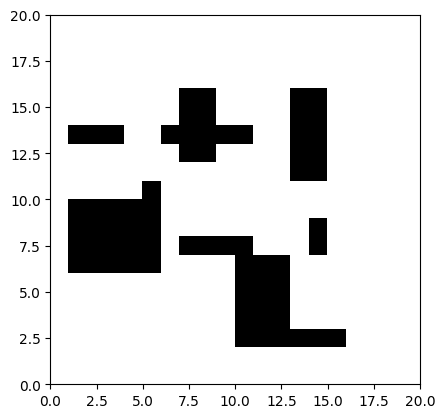

In [7]:
plt.imshow(grid, cmap='gray_r', origin = 'lower', extent=[0,X,0,Y])

Pick the start and end point

In [8]:
#start point

x1 = random.randint(0, 19);
y1 = random.randint(0, 19);

while grid[x1][y1] == 1:
    x1 = random.randint(0, 19);
    y1 = random.randint(0, 19);


#finish point

x2 = random.randint(0, 19);
y2 = random.randint(0, 19);

while grid[x2][y2] == 1:
    x2 = random.randint(0, 19);
    y2 = random.randint(0, 19);

grid[x1][y1] = 50
grid[x2][y2] = 75
print("start at (", x1, ',', y1, ") and finish at (", x2, ',', y2, ")");

start at ( 4 , 17 ) and finish at ( 10 , 3 )


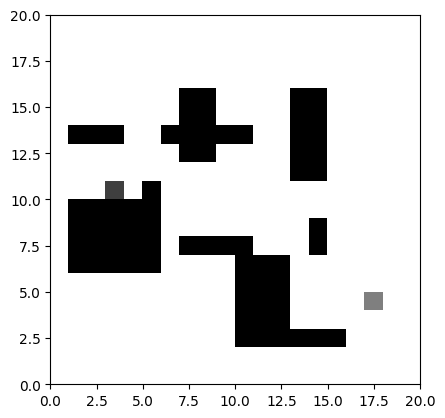

In [9]:
plt.imshow(grid, cmap='gray_r', origin = 'lower', extent=[0,X,0,Y])

Navigate while avoiding obstacles

In [10]:
# Define a class that represents a cell

class Node:

    @property
    def parent(self):
        return self._parent
    
    @parent.setter
    def parent(self, value):
        if not isinstance(value, type(self)):
            raise ValueError(f"Parent value must be of type {self._type}")
        self._parent = value
        
    def __init__(self, x: int, y: int, there = None):
        self.x = x;
        self.y = y;
        self.cost = costFun(self, there);

    def __repr__(self):
        return "Node(%d, %d, %.4f)" % (self.x, self.y, self.cost)

    def __eq__(self, other):
        if isinstance(other, Node):
            return ((self.x == other.x) and (self.y == other.y))
        else:
            return False
            
    def __ne__(self, other):
        return (not self.__eq__(other))
        
    def __hash__(self):
        return hash(hash(self.x)+ hash(self.y))

    def __lt__(self, other):
        return self.cost < other.cost;

    def __gt__(self, other):
        return self.cost > other.cost;

In [11]:
import math
def costFun(here, there):
    if here == None or there == None:
        return -1;
    return math.sqrt(math.pow(here.x-there.x, 2) + math.pow(here.y-there.y, 2));

In [12]:
# Greedy

#create a Node for start and finish

start = Node(x1, y1)
finish = Node(x2, y2)

start.cost = costFun(start, finish);

print("total distance", costFun(start, finish));

total distance 15.231546211727817


In [25]:
# create a priority queue and a visited set
from queue import PriorityQueue

# Create a PriorityQueue object
pq = PriorityQueue()

# Add elements with their priorities
pq.put((start.cost, start))

visited = set()

curr = None;

# Retrieve elements in order of priority
while not pq.empty():
    cost, curr = pq.get()
    visited.add(curr);
    grid[curr.x][curr.y] = 30;
    print("Processing: ",vars(curr), "(Priority: ",cost,")")
    if(curr.cost == 0):
        print("reached the finish line");
        break;
    if curr.x - 1 >=0 and not isObstacle(grid[curr.x-1][curr.y]):
        left = Node(curr.x-1, curr.y, finish);
        left.parent = curr;
        if left not in visited:
            print("Adding Left:", left);
            grid[left.x][left.y] = 30;
            pq.put((left.cost, left));
    if curr.x + 1 < X and not isObstacle(grid[curr.x+1][curr.y]):
        right = Node(curr.x+1, curr.y, finish);
        right.parent = curr;
        if right not in visited:
            print("Adding right:", right);
            grid[right.x][right.y] = 30;
            pq.put((right.cost, right));
    if curr.y - 1 >=0 and not isObstacle(grid[curr.x][curr.y-1]):
        down = Node(curr.x, curr.y-1, finish);
        down.parent = curr;
        if down not in visited:
            print("Adding down:", down);
            grid[down.x][down.y] = 30;
            pq.put((down.cost, down));
    if curr.y + 1 < Y and not isObstacle(grid[curr.x][curr.y+1]):
        up = Node(curr.x, curr.y+1, finish);
        up.parent = curr;
        if up not in visited:
            print("Adding up:", up);
            grid[up.x][up.y] = 30;
            pq.put((up.cost, up));
    # print(vars(pq));



Processing:  {'x': 4, 'y': 17, 'cost': 15.231546211727817} (Priority:  15.231546211727817 )
Adding Left: Node(3, 17, 15.6525)
Adding right: Node(5, 17, 14.8661)
Adding down: Node(4, 16, 14.3178)
Adding up: Node(4, 18, 16.1555)
Processing:  {'x': 4, 'y': 16, 'cost': 14.317821063276353, '_parent': Node(4, 17, 15.2315)} (Priority:  14.317821063276353 )
Adding Left: Node(3, 16, 14.7648)
Adding right: Node(5, 16, 13.9284)
Adding down: Node(4, 15, 13.4164)
Processing:  {'x': 4, 'y': 15, 'cost': 13.416407864998739, '_parent': Node(4, 16, 14.3178)} (Priority:  13.416407864998739 )
Adding Left: Node(3, 15, 13.8924)
Adding right: Node(5, 15, 13.0000)
Adding down: Node(4, 14, 12.5300)
Processing:  {'x': 4, 'y': 14, 'cost': 12.529964086141668, '_parent': Node(4, 15, 13.4164)} (Priority:  12.529964086141668 )
Adding Left: Node(3, 14, 13.0384)
Adding right: Node(5, 14, 12.0830)
Adding down: Node(4, 13, 11.6619)
Processing:  {'x': 4, 'y': 13, 'cost': 11.661903789690601, '_parent': Node(4, 14, 12.5300

In [26]:
print("path taken");

curr = curr.parent;

while curr is not None and curr is not start:
    grid[curr.x][curr.y] = 40;
    print(vars(curr));
    curr = curr.parent;

grid[start.x][start.y] = 60;
grid[finish.x][finish.y] = 75;

path taken
{'x': 10, 'y': 4, 'cost': 1.0, '_parent': Node(11, 4, 1.4142)}
{'x': 11, 'y': 4, 'cost': 1.4142135623730951, '_parent': Node(11, 5, 2.2361)}
{'x': 11, 'y': 5, 'cost': 2.23606797749979, '_parent': Node(11, 6, 3.1623)}
{'x': 11, 'y': 6, 'cost': 3.1622776601683795, '_parent': Node(10, 6, 3.0000)}
{'x': 10, 'y': 6, 'cost': 3.0, '_parent': Node(9, 6, 3.1623)}
{'x': 9, 'y': 6, 'cost': 3.1622776601683795, '_parent': Node(8, 6, 3.6056)}
{'x': 8, 'y': 6, 'cost': 3.605551275463989, '_parent': Node(8, 7, 4.4721)}
{'x': 8, 'y': 7, 'cost': 4.47213595499958, '_parent': Node(8, 8, 5.3852)}
{'x': 8, 'y': 8, 'cost': 5.385164807134504, '_parent': Node(8, 9, 6.3246)}
{'x': 8, 'y': 9, 'cost': 6.324555320336759, '_parent': Node(8, 10, 7.2801)}
{'x': 8, 'y': 10, 'cost': 7.280109889280518, '_parent': Node(8, 11, 8.2462)}
{'x': 8, 'y': 11, 'cost': 8.246211251235321, '_parent': Node(7, 11, 8.5440)}
{'x': 7, 'y': 11, 'cost': 8.54400374531753, '_parent': Node(7, 12, 9.4868)}
{'x': 7, 'y': 12, 'cost': 

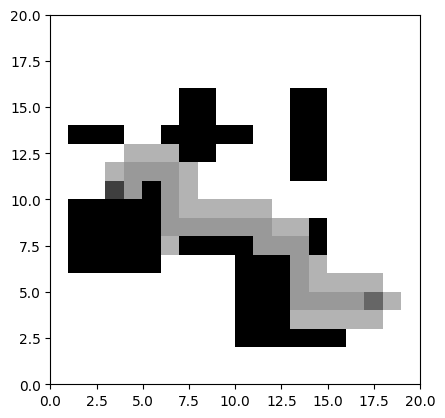

In [27]:
plt.imshow(grid, cmap='gray_r', origin = 'lower', extent=[0,X,0,Y])

In [24]:
print(visited)

{Node(10, 3, 0.0000), Node(8, 6, 3.6056), Node(9, 6, 3.1623), Node(8, 7, 4.4721), Node(8, 8, 5.3852), Node(8, 10, 7.2801), Node(4, 13, 11.6619), Node(4, 14, 12.5300), Node(4, 15, 13.4164), Node(4, 16, 14.3178), Node(4, 17, 15.2315), Node(5, 13, 11.1803), Node(6, 13, 10.7703), Node(7, 13, 10.4403), Node(7, 12, 9.4868), Node(8, 11, 8.2462), Node(10, 4, 1.0000), Node(11, 4, 1.4142), Node(10, 6, 3.0000), Node(11, 5, 2.2361), Node(8, 9, 6.3246), Node(11, 6, 3.1623), Node(7, 11, 8.5440)}


# 